## Exploratory analysis of Car MPG data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
%matplotlib inline

data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original", delim_whitespace = True, \
 header=None, names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model', 'origin', 'car_name'])

data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino
...,...,...,...,...,...,...,...,...,...
401,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1.0,ford mustang gl
402,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,2.0,vw pickup
403,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1.0,dodge rampage
404,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,1.0,ford ranger


### Question1: 


How many cars and how many attributes are in the data set

In [2]:
data.shape

(406, 9)

### Question 2:

How many distinct car companies are represented in the data set?

In [3]:
data['brand'] = data.car_name.str.split().str[0]
len(data['brand'].unique())

38

What is the name of the car
with the best MPG? 

In [4]:
data.iloc[data.mpg.argmax()].car_name

'mazda glc'

What car company produced the most 8-cylinder cars?

In [5]:
cyl8 = data[data.cylinders == 8] 
cyl8_brand = cyl8.groupby('brand')['cylinders'].count().reset_index()
cyl8_brand

,brand,cylinders
0,amc,9
1,buick,7
2,cadillac,2
3,chevrolet,19
4,chevy,2
5,chrysler,4
6,dodge,12
7,ford,22
8,hi,1
9,mercury,5


In [6]:
cyl8_brand.loc[cyl8_brand.cylinders.argmax()].brand

'ford'

What are the names
of 3-cylinder cars?

In [7]:
cyl3 = data[data.cylinders==3]
cyl3.car_name

78     mazda rx2 coupe
118          maxda rx3
250         mazda rx-4
341      mazda rx-7 gs
Name: car_name, dtype: object

Do some internet search that can tell you about the history and popularity of
those 3-cylinder cars.

Nhiều người đã từng có những định kiến không tốt về động cơ 3 xi lanh cho xe hơi, nhưng với công nghệ hiện nay, và nhìn nhận lại, thì động cơ 3 xi lanh có ưu điểm riêng của nó, và hiện nay động cơ 3 xi lanh rất phổ biến, được lắp đặt trên rất nhiều xe hơi. 

### Question 3:

What is the range, mean, and standard deviation of each attribute?

In [8]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin
count,398.000000,406.000000,406.000000,400.000000,406.000000,406.000000,406.000000,406.000000
mean,23.514573,5.475369,194.779557,105.082500,2979.413793,15.519704,75.921182,1.568966
std,7.815984,1.712160,104.922458,38.768779,847.004328,2.803359,3.748737,0.797479
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,105.000000,75.750000,2226.500000,13.700000,73.000000,1.000000
50%,23.000000,4.000000,151.000000,95.000000,2822.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,302.000000,130.000000,3618.250000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


Pay attention to potential
missing values

In [9]:
data.isna()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name,brand
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
401,False,False,False,False,False,False,False,False,False,False
402,False,False,False,False,False,False,False,False,False,False
403,False,False,False,False,False,False,False,False,False,False
404,False,False,False,False,False,False,False,False,False,False


### Question 4:


Plot histograms for each attribute. Pay attention to the appropriate choice of number of bins.

In [10]:
def make_bins(min, max):
    max = int(max)
    interval = int((max-min)/10) # control bins size 
    temp = str(interval)
    num_len = len(temp)

    # to make the plot easier to look
    # the interval have to be one of the values below.
    intervals = np.array([1,2,2.5,5]) *pow(10,num_len-1) 
    
    # choose the interval from the array above
    close = max
    interval3 = 0
    for i in intervals:
        close1 = abs(i-interval)
        if close1 <= close:
            interval3 = i
            close = close1
    interval = int(interval3)

    # get the value for the first bin.
    first_bin = 0
    for i in range(0,max, interval):
        if i <= min:
            first_bin = i
        else:
            break
    return [x for x in range(first_bin, max+interval+1,interval )]

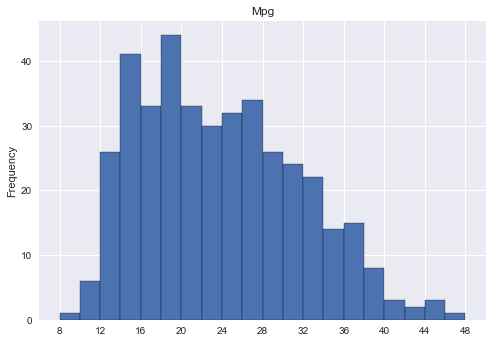

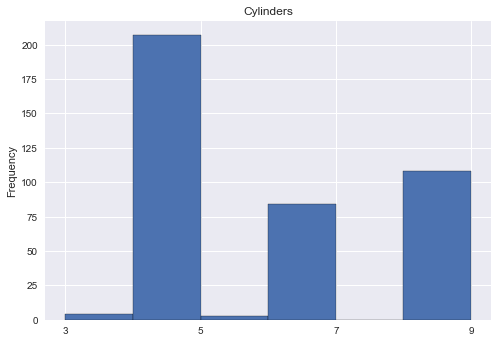

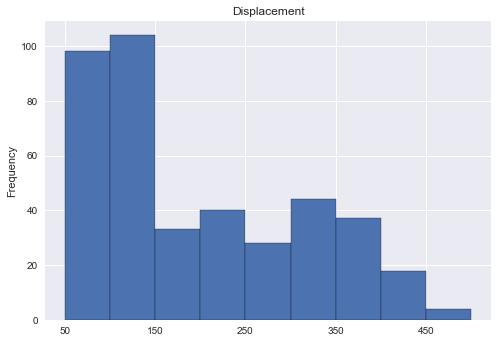

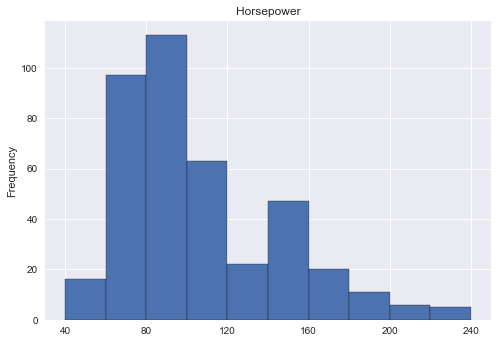

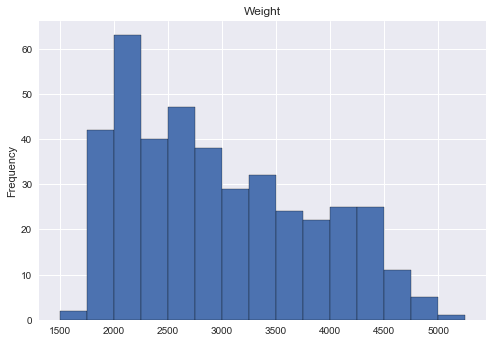

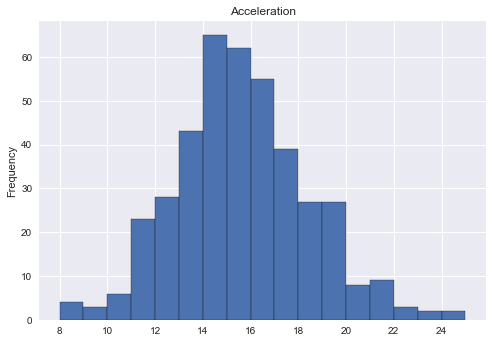

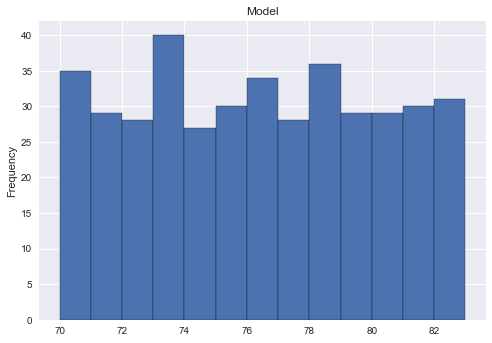

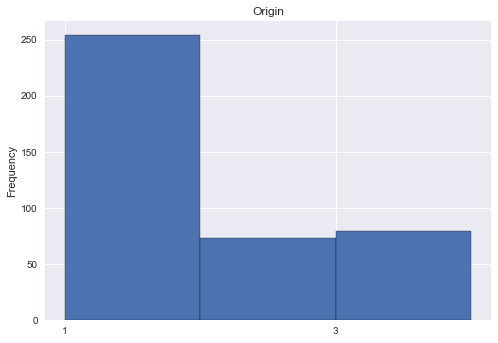

In [11]:
style.use('seaborn')
col_names = data.columns
for col in col_names[0:-2]:
    max = data[col].max()
    min = data[col].min()
    bins = make_bins(min, max)
    # print(max)  
    data[col].plot.hist(edgecolor = 'black', bins = bins, xticks = bins[::2])
    plt.xticks()
    plt.title(col.capitalize())
    plt.show()

Nhận xét: Đa phần các xe hơi vẫn khá tốn nhiên liệu, phần lớn các xe có mpg dưới 30, rất ít xe tiết kiệm nhiên liệu (trên 40 mpg). Phân nữa các loại xe là động cơ 4 xi lanh, nữa còn lại là 6 và 8 xi lanh, xe 3 và 5 xi lanh có rất ít trong dữ liệu, 7 xi lanh gần như không có. Hầu hết các xe khá nhẹ, có mã lực thấp, và có khả năng thay thế.

### Question 5:

Plot a scatterplot of weight vs. MPG attributes. 

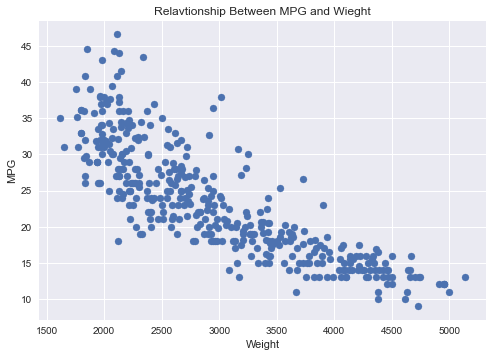

In [12]:
plt.scatter(x = data.weight, y = data.mpg)
plt.ylabel('MPG')
plt.xlabel('Weight')
plt.title('Relavtionship Between MPG and Wieght')
plt.show()

What do you conclude about the relationship
between the attributes?

Cân nặng và độ hao xăng tỉ lệ nghịch với nhau. Xe càng nặng thì càng tốn nhiên liệu, xe nhẹ thì tiết kiệm nhiên liệu hơn.

What is the correlation coefficient between the 2 attributes?

In [13]:
weight_mpg_df = data[['weight', 'mpg']]
weight_mpg_df.corr()

,weight,mpg
weight,1.000000,-0.831741
mpg,-0.831741,1.000000


Correlation coefficient betwene Weight and MPG is: -0.831741


### Question 6:

Plot a scatterplot of year vs. cylinders attributes. 

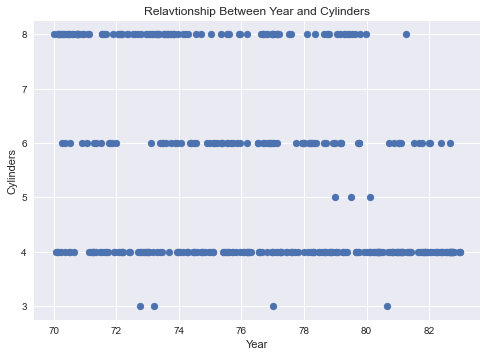

In [14]:
year = data.model+np.random.random(len(data.model))
plt.scatter(x = year, y = data.cylinders)
plt.ylabel('Cylinders')
plt.xlabel('Year')
plt.title('Relavtionship Between Year and Cylinders')
plt.show()

Hầu hết các xe hơi được sản xuất theo công nghệ động cơ 4 xi lanh, động cơ 6 và 8 xi lanh cũng khá phổ biến trong thời gian này. Bên cạnh đó động cơ 3 và 5 xi lanh không được ưa chuộng và ít được sản xuất.

### Question 7:

Show 2 more scatterplots that are interesting do you. Discuss what you see.

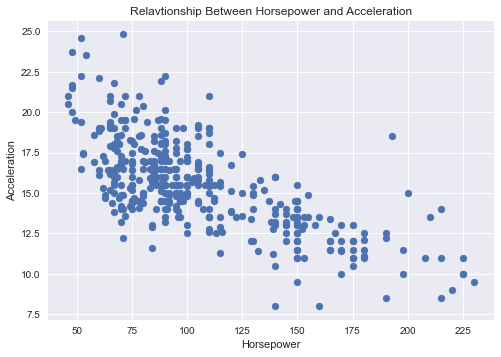

In [15]:
plt.scatter(x = data.horsepower, y = data.acceleration)
plt.xlabel('Horsepower')
plt.ylabel('Acceleration')
plt.title('Relavtionship Between Horsepower and Acceleration')
plt.show()

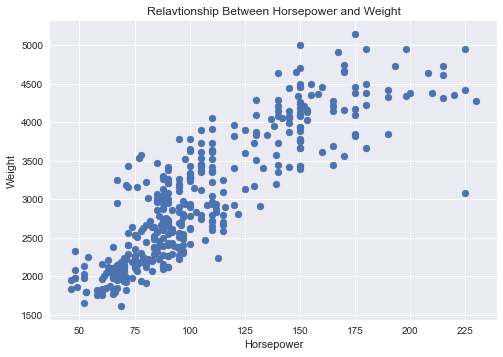

In [16]:
plt.scatter(x = data.horsepower, y = data.weight)
plt.xlabel('Horsepower')
plt.ylabel('Weight')
plt.title('Relavtionship Between Horsepower and Weight')
plt.show()

Nhận xét: Dựa vào hình một ta có thể thấy một cách rõ ràng là mã lực tỉ lệ nghịch với khả năng tăng tốc của xe. Đây là một điều khá lạ theo như thường lệ thì hai thông số này phải tỉ lệ thuận với nhau, động cơ mạnh thì xe chạy nhanh hơn. Để tìm hiểu thêm về điều này ta vẽ biểu đồ thứ hai về sự tương quan của mã lực và cân nặng của xe. Ta thấy mã lực tỉ lệ thuận với cân nặng của xe, và cân nặng có tốc độ tăng trưởng cao hơn một xíu. Điều này lý giải vấn đề ở hình thứ nhất. Tuy mã lực cao nhưng vì xe quá nặng nên độ gia tốc của xe không hề tăng lên mà lại giảm xuống.

### Question 8:

Plot a time series for all the companies that show how many new cars they introduces during
each year

In [17]:
brand_new_car = data.groupby(['brand', 'model'])['car_name'].count().reset_index()
brand_new_car

,brand,model,car_name
0,amc,70.0,5
1,amc,71.0,3
2,amc,72.0,2
3,amc,73.0,4
4,amc,74.0,3
...,...,...,...
214,volvo,81.0,1
215,vw,76.0,1
216,vw,79.0,1
217,vw,80.0,3


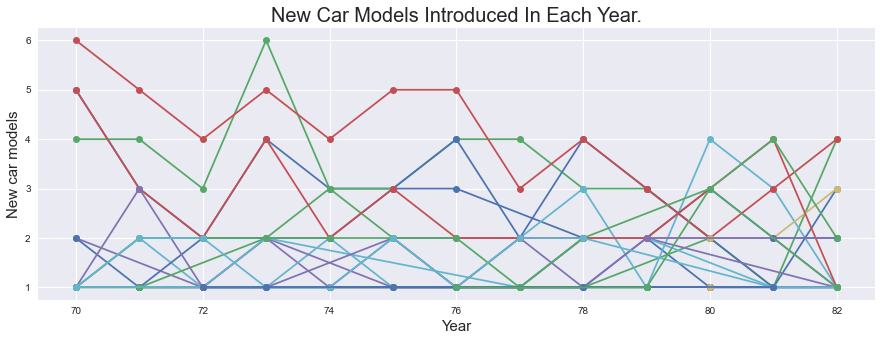

In [18]:
plt.figure(figsize = (15,5))
brands = brand_new_car.brand.unique()

for brand in brands:
    temp_df = brand_new_car[brand_new_car.brand == brand]
    plt.plot(temp_df.model, temp_df.car_name, marker = 'o')

plt.xlabel('Year', fontsize = 15)
plt.ylabel('New car models', fontsize = 15)
plt.title('New Car Models Introduced In Each Year.', fontsize = 20)
plt.show()


Nhận xét: Hầu hết các hãng xe ít ra mắt xe mới hơn theo thời gian. Trung bình số xe mới mà các hãng ra mắt hằng nằm là 2 cho đến 3 mẫu xe.

### Question 9:
Calculate the pairwise correlation, and draw the heatmap with Matplotlib.

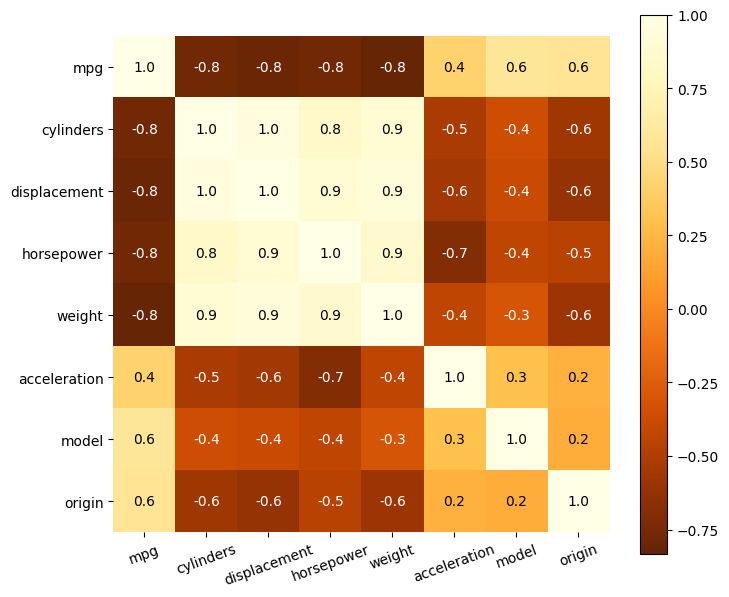

In [19]:
corr = data.iloc[:,:8].corr()

style.use('default')
fig, ax = plt.subplots(figsize= (8,7)) 

im = ax.imshow(corr, 'YlOrBr_r')

cbar = ax.figure.colorbar(im, ax=ax, )

plt.xticks(ticks = [x for x in range(0, 8)], labels = corr.columns.tolist())
plt.yticks(ticks = [x for x in range(0, 8)], labels = corr.columns.tolist())

for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        text = round(corr.iloc[i,j],1)
        if text > 0:
            plt.text(j, i, text,ha="center", va="center", color="black")
        else:
            plt.text(j, i, text,ha="center", va="center", color="white")


ax.spines[:].set_visible(False)
plt.tick_params('x',rotation = 20)

Nhận xét: Heatmap cho thấy mã lực và cân nặng tỉ lệ nghịch với mpg. Điều này cho thấy chỉ xe nhẹ cộng cơ vừa phải sẽ giúp xe tiết kiệm được nhiên liệu hơn. Đáng ngạc nhiên khi model theo các năng lại tỉ lệ thuận với mpg (chỉ số tiêu thụ nhiên liệu), qua các năm, các xe không hề giảm tiêu thụ nhiên liệu mà còn tăng lên. Nhìn vào model và cân nặng , mã lực của xe thì ta thấy chúng tỉ lệ nghịch với nhau. Điều này lý giải tại sai sau các năm các xe lại tốn nhiên liệu hơn. Vậy ta có thể thấy vào thời đó các hãng xe không để ý tới việc tạo ra các xe ít tốn nhiên liệu hơn mà tập trung vào sản xuất xe to hơn, mạnh hơn để thu hút khách hàng. 

## Electric power consumption data 

In [20]:
import pandas as pd
data1 = pd.read_csv('household_power_consumption.txt', sep = ';', na_values = '?')
data1

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.000,239.70,3.8,0.0,0.0,0.0


In [21]:
data1.dtypes

Date                      object
Time                      object
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

### First calculate a rough estimate of how much memory the dataset will require in memory before reading into Python

- Đối với kiểu dữ liệu object, cần 50 MB bộ nhớ cho mỗi biến để lưu trữ các phương thức như length(), split(),..., đối với character đầu tiên, cần 8 bytes, các character còn lại mỗi character 1 bytes. 
- Đối với kiểu dữ liệu float64 8 bytes cho mỗi biến.

- Đối với cột Time, mỗi biến có 10 kí tự: (8+9+50)*2075259 = 134891835
- Đối với cột Date, trung bình mỗi biến có 12 kí tự: (8+11+50)*2075259 = 143192871
- 7 cột numeric, kiểu dữ liệu là float64: 8*2075259 = 16602072
- index 128 MB

In [22]:
(134891835 + 143192871 + 16602072*7 + 128) / 2**20

376.0331516265869

In [23]:
data1.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(7), object(2)
memory usage: 370.0 MB


In [24]:
data1.memory_usage(deep = True)

Index                          128
Date                     136859313
Time                     134891835
Global_active_power       16602072
Global_reactive_power     16602072
Voltage                   16602072
Global_intensity          16602072
Sub_metering_1            16602072
Sub_metering_2            16602072
Sub_metering_3            16602072
dtype: int64

### Plot 1

In [25]:
datetime = data1.Time + ' '+ data1.Date
data1['DateTime'] = pd.to_datetime(datetime, format='%H:%M:%S %d/%m/%Y')

df = data1[data1.DateTime<'2007-02-03']
df = df[df.DateTime>='2007-02-01']

print(df.shape)
df = df.dropna()
print(df.shape)

columns_name = ['Global_active_power','Global_reactive_power','Voltage','Global_intensity','Sub_metering_1','Sub_metering_2']
for col in columns_name:
    df[col] = df[col].astype('float64')
print(df.dtypes)
df


(2880, 10)
(2880, 10)
Date                             object
Time                             object
Global_active_power             float64
Global_reactive_power           float64
Voltage                         float64
Global_intensity                float64
Sub_metering_1                  float64
Sub_metering_2                  float64
Sub_metering_3                  float64
DateTime                 datetime64[ns]
dtype: object


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime
66636,1/2/2007,00:00:00,0.326,0.128,243.15,1.4,0.0,0.0,0.0,2007-02-01 00:00:00
66637,1/2/2007,00:01:00,0.326,0.130,243.32,1.4,0.0,0.0,0.0,2007-02-01 00:01:00
66638,1/2/2007,00:02:00,0.324,0.132,243.51,1.4,0.0,0.0,0.0,2007-02-01 00:02:00
66639,1/2/2007,00:03:00,0.324,0.134,243.90,1.4,0.0,0.0,0.0,2007-02-01 00:03:00
66640,1/2/2007,00:04:00,0.322,0.130,243.16,1.4,0.0,0.0,0.0,2007-02-01 00:04:00
...,...,...,...,...,...,...,...,...,...,...
69511,2/2/2007,23:55:00,3.696,0.226,240.90,15.2,0.0,1.0,18.0,2007-02-02 23:55:00
69512,2/2/2007,23:56:00,3.698,0.226,241.02,15.2,0.0,2.0,18.0,2007-02-02 23:56:00
69513,2/2/2007,23:57:00,3.684,0.224,240.48,15.2,0.0,1.0,18.0,2007-02-02 23:57:00
69514,2/2/2007,23:58:00,3.658,0.220,239.61,15.2,0.0,1.0,17.0,2007-02-02 23:58:00


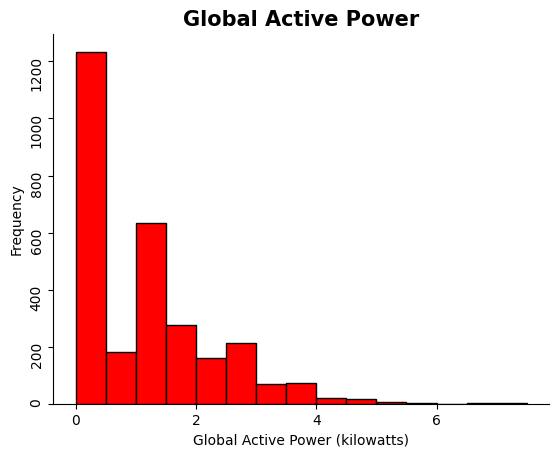

In [26]:
def plot1(ax = None):
    ax = plt.gca()
    if not ax:
        ax = plt.subplot()
    bins = np.array([x for x in range(0,80,5)])
    bins = bins/10
    ax.hist(df.Global_active_power, edgecolor = 'black', color = 'r', bins = bins)  
    plt.xticks(ticks = [0,2,4,6])  
    ax.spines[['right', 'top']].set_visible(False)
    plt.yticks(rotation = 90)
    plt.xlabel('Global Active Power (kilowatts)')
    plt.ylabel('Frequency')
    plt.title('Global Active Power', fontsize = 15, fontweight = 'bold')
    return ax
plot1();

### Plot2

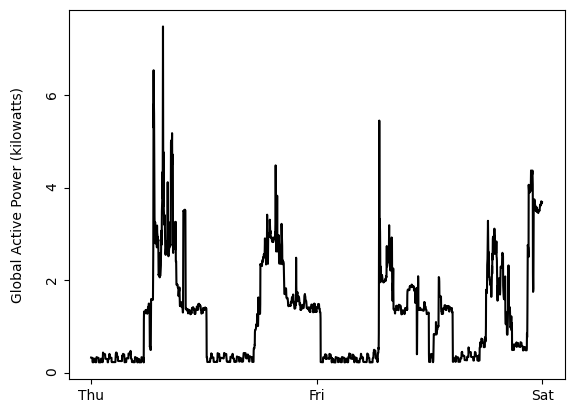

In [27]:
def plot2(ax = None):
    ax = plt.gca()
    if not ax:
        ax = plt.subplot()
    plt.plot(df.DateTime, df.Global_active_power, color = 'black')
    plt.xticks(ticks = ['2007-02-01','2007-02-02','2007-02-03'], labels = ['Thu', 'Fri', 'Sat'])
    plt.yticks(ticks = [0,2,4,6],  rotation = 90)
    plt.ylabel('Global Active Power (kilowatts)', labelpad = 15)
    return ax
plot2();

### Plot3

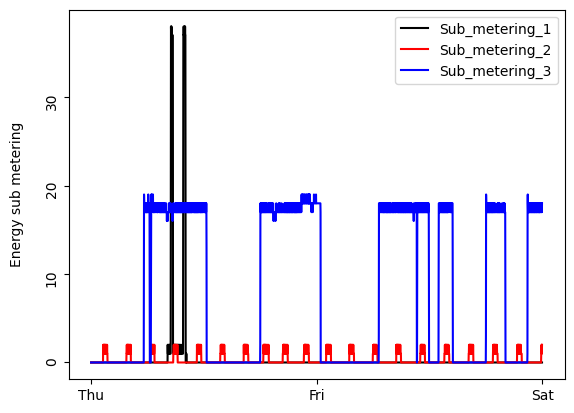

In [28]:
def plot3(ax = None):
    ax = plt.gca()
    if not ax:
        ax = plt.subplot()
    plt.plot(df.DateTime, df.Sub_metering_1, color = 'black', label = 'Sub_metering_1')
    plt.plot(df.DateTime, df.Sub_metering_2, color = 'red', label = 'Sub_metering_2')
    plt.plot(df.DateTime, df.Sub_metering_3, color = 'blue', label = 'Sub_metering_3')
    plt.xticks(ticks = ['2007-02-01','2007-02-02','2007-02-03'], labels = ['Thu', 'Fri', 'Sat'])
    plt.yticks(ticks = [0,10,20,30], rotation = 90)
    plt.ylabel('Energy sub metering', labelpad=15)
    plt.legend()
    return ax

plot3();

### Plot 4:

In [29]:
def line_plot(ax, x, y, xticks, xlabels, yticks, xtitle = None, ytitle = None):
    ax = plt.gca()
    plt.plot(x, y, color = 'black')
    plt.xticks(ticks = xticks, labels = xlabels)
    plt.yticks(ticks = yticks, rotation = 90)
    plt.xlabel(xtitle, labelpad = 15)
    plt.ylabel(ytitle, labelpad=15)
    return ax


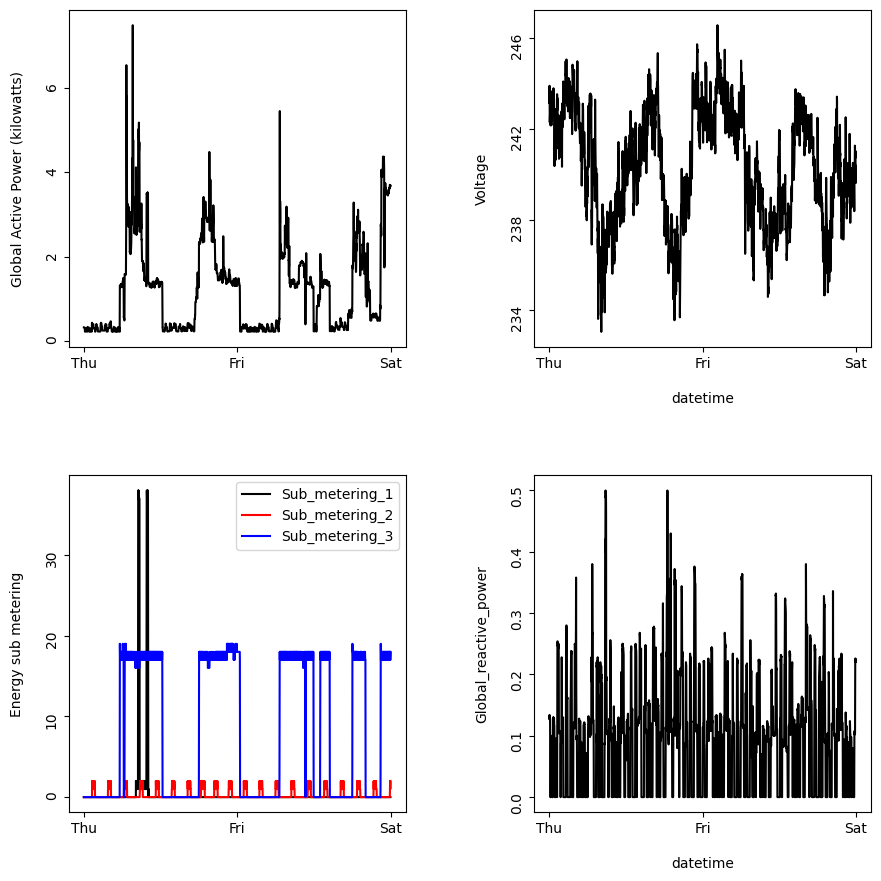

In [30]:
def plot4():
    fig = plt.figure(figsize = (10,10))

    ax1 = plt.subplot(221)
    ax1 = plot2(ax1)

    ax3 = plt.subplot(223)
    ax3 = plot3(ax3)

    ax2 = plt.subplot(222)
    ax2 = line_plot(ax2, df.DateTime, df.Voltage,  
        ['2007-02-01','2007-02-02','2007-02-03'], ['Thu', 'Fri', 'Sat'],
        [234,238,242, 246], 'datetime','Voltage' )

    ax2 = plt.subplot(224)
    ax2 = line_plot(ax2, df.DateTime, df.Global_reactive_power,  
        ['2007-02-01','2007-02-02','2007-02-03'], ['Thu', 'Fri', 'Sat'],
        [0.0, 0.1, 0.2, 0.3, 0.4, 0.5], 'datetime','Global_reactive_power' )    
    plt.tight_layout(pad= 5)
    plt.show()
plot4()

Câu chuyện về việc sử dụng năng lượng của hộ gia đình trong 2 ngày

Trong 2 ngày ta thấy được hộ gia đình có tần suất sử dụng điện ở mức công suất từ trung bình tới thấp(Plot 1), trong đó điện được sử dụng nhiều nhất là vào khoảng buổi trưa và buổi tối(Plot 2). Dựa vào Plot 3 ta thấy được vào buổi trưa lượng điện được sử dụng nhiều vào các thiết bị bếp như máy rửa chén, lò vi sóng, còn buổi trưa, tối sẽ là máy sưởi, máy nước nóng.
